In [1]:
import pandas as pd

df = pd.read_csv(r'Employee Satisfaction Index.csv')
pd.set_option('display.max_rows', 4)
df

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0
499,499,TECH7731,26,Technology,City,UG,Recruitment Agency,3,4,0,3,0,42419,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [3]:
df.describe()

,Unnamed: 0,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.00,500.00,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,249.50,38.61,3.032,3.072,0.466,4.538,0.496,50416.056,0.526
...,...,...,...,...,...,...,...,...,...
75%,374.25,47.00,4.000,4.000,1.000,7.000,1.000,65715.000,1.000
max,499.00,54.00,5.000,5.000,1.000,9.000,1.000,86750.000,1.000


In [4]:
df.describe(include=['O']).T

,count,unique,top,freq
emp_id,500,499,MKT7287,2
Dept,500,5,Purchasing,109
...,...,...,...,...
education,500,2,PG,254
recruitment_type,500,4,On-Campus,133


<AxesSubplot:xlabel='satisfied'>

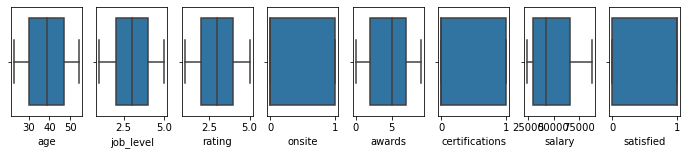

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,8, figsize=(12, 2))
sns.boxplot(x=df.columns[2], data=df, ax=ax[0])
sns.boxplot(x=df.columns[7], data=df, ax=ax[1])
sns.boxplot(x=df.columns[8], data=df, ax=ax[2])
sns.boxplot(x=df.columns[9], data=df, ax=ax[3])
sns.boxplot(x=df.columns[10], data=df, ax=ax[4])
sns.boxplot(x=df.columns[11], data=df, ax=ax[5])
sns.boxplot(x=df.columns[12], data=df, ax=ax[6])
sns.boxplot(x=df.columns[13], data=df, ax=ax[7])

In [13]:
from pyecharts import Boxplot
#字段重命名
df.columns=['satisfied', 'age', 'Dept', 'location', 'education','recruitment_type', 'job_level', 'rating', 
            'onsite', 'certifications',  'salary', 'awards', 'Unnamed', ' emp_id ']
#绘制箱线图
boxplot = Boxplot("对公司满意度与是否离职关系图", title_pos='center')
# x_axis = ['在职', '离职']
y_axis = [df[df.left == 0].satisfaction.values, df[df.left == 1].satisfaction.values]
boxplot.add("", x_axis, boxplot.prepare_data(y_axis))
boxplot.render('对公司满意度与是否离职关系图.html')
webbrowser.open('对公司满意度与是否离职关系图.html')

AttributeError: 'DataFrame' object has no attribute 'left'

In [7]:
boxplot = Boxplot("最新评估与是否离职关系图", title_pos='center')
x_axis = ['在职', '离职']
y_axis = [df[df.left == 0].evaluation.values, df[df.left == 1].evaluation.values]
boxplot.add("", x_axis, boxplot.prepare_data(y_axis))
boxplot.render('最新评估与是否离职关系图.html')
webbrowser.open('最新评估与是否离职关系图.html')

True

In [8]:
from pyecharts import Bar, Pie, Grid
#按照项目数分组分别求离职人数和所有人数
project_left_1 = df[df.left == 1].groupby('project')['left'].count()
project_all = df.groupby('project')['left'].count()
#分别计算离职人数和在职人数所占比例
project_left1_rate = project_left_1 / project_all
project_left0_rate = 1 - project_left1_rate
attr = project_left1_rate.index
bar = Bar("所参加项目数与是否离职的关系图", title_pos='10%')
bar.add("离职", attr, project_left1_rate, is_stack=True)
bar.add("在职", attr, project_left0_rate, is_stack=True, legend_pos="left", legend_orient="vertical")
#绘制圆环图
pie = Pie("各项目数所占百分比", title_pos='center')
pie.add('', project_all.index, project_all, radius=[35, 60], label_text_color=None, 
        is_label_show=True, legend_orient="vertical", legend_pos="67%")
grid = Grid(width=1200)
grid.add(bar, grid_right="67%")
grid.add(pie)
grid.render("所参加项目数与是否离职的关系图.html")
webbrowser.open("所参加项目数与是否离职的关系图.html")

True

In [9]:
boxplot = Boxplot("平均每月工作时长与是否离职关系图", title_pos='center')
x_axis = ['在职', '离职']
y_axis = [df[df.left == 0].hours.values, df[df.left == 1].hours.values]
boxplot.add("", x_axis, boxplot.prepare_data(y_axis))
boxplot.render("平均每月工作时长与是否离职关系图.html")
webbrowser.open("平均每月工作时长与是否离职关系图.html")

True

In [10]:
from pyecharts import Bar, Pie, Grid
#按照工作年限分别求离职人数和所有人数
years_left_0 = df[df.left == 0].groupby('years_work')['left'].count()
years_all = df.groupby('years_work')['left'].count()
#分别计算离职人数和在职人数所占比例
years_left0_rate = years_left_0 / years_all
years_left1_rate = 1 - years_left0_rate
attr = years_all.index
bar = Bar("工作年限与是否离职的关系图", title_pos='10%')
bar.add("离职", attr, years_left1_rate, is_stack=True)
bar.add("在职", attr, years_left0_rate, is_stack=True, legend_pos="left" , legend_orient="vertical")
#绘制圆环图
pie = Pie("各工作年限所占百分比", title_pos='center')
pie.add('', years_all.index, years_all, radius=[35, 60], label_text_color=None, 
        is_label_show=True, legend_orient="vertical", legend_pos="67%")
grid = Grid(width=1200)
grid.add(bar, grid_right="67%")
grid.add(pie)
grid.render("工作年限与是否离职的关系图.html")
webbrowser.open("工作年限与是否离职的关系图.html")

True

In [11]:
from pyecharts import Bar
accident_left = pd.crosstab(df.work_accident, df.left)
attr = accident_left.index
bar = Bar("是否发生工作事故与是否离职的关系图", title_pos='center')
bar.add("离职", attr, accident_left[1], is_stack=True)
bar.add("在职", attr, accident_left[0], is_stack=True, legend_pos="left" , legend_orient="vertical", is_label_show=True)
bar.render("工作年限与是否离职的关系图.html")
webbrowser.open("工作年限与是否离职的关系图.html")

True

In [12]:
promotion_left = pd.crosstab(df.promotion, df.left)
attr = promotion_left.index
bar = Bar("5年内是否升职与是否离职的关系图", title_pos='center')
bar.add("离职", attr, promotion_left[1], is_stack=True)
bar.add("在职", attr, promotion_left[0], is_stack=True, legend_pos="left" , legend_orient="vertical", is_label_show=True)
bar.render("5年内是否升职与是否离职的关系图.html")
webbrowser.open("5年内是否升职与是否离职的关系图.html")

True

In [13]:
#分别计算各岗位离职人员比例和各岗位占总体百分比
department_left_0 = df[df.left == 0].groupby('department')['left'].count()
department_all = df.groupby('department')['left'].count()
department_left0_rate = department_left_0 / department_all
department_left1_rate = 1 - department_left0_rate
attr = department_all.index
bar = Bar("岗位与离职比例的关系图", title_top='40%')
bar.add("离职", attr, department_left1_rate, is_stack=True)
bar.add("在职", attr, department_left0_rate, is_stack=True, is_datazoom_show=True,
        xaxis_interval=0, xaxis_rotate=30,  legend_top="45%",  legend_pos="80%")
#绘制圆环图
pie = Pie("各个岗位所占百分比", title_pos='left')
pie.add('', department_all.index, department_all,center=[50, 23], radius=[18, 35], label_text_color=None, 
        is_label_show=True, legend_orient="vertical", legend_pos="80%", legend_top="4%")
grid = Grid(width=1200, height=700)
grid.add(bar, grid_top="50%", grid_bottom="25%")
grid.add(pie)
grid.render("岗位与离职比例的关系图.html")
webbrowser.open("岗位与离职比例的关系图.html")

True

In [14]:
from pyecharts import Bar
#按照薪资水平分别求离职人数和所有人数
salary_left = pd.crosstab(df.salary, df.left).sort_values(0, ascending = False)
attr = salary_left.index
bar = Bar("薪资水平和是否离职的关系图", title_pos='center')
bar.add("离职", attr, salary_left[1], is_stack=True)
bar.add("在职", attr, salary_left[0], is_stack=True, legend_pos="left" , legend_orient="vertical", is_label_show=True)
bar.render("薪资水平和是否离职的关系图.html")
webbrowser.open("薪资水平和是否离职的关系图.html")

True

In [14]:
df['salary'] = df.salary.map({"low": 0, "medium": 1, "high": 2})
df.salary.unique()

array([nan])

In [15]:
df_one_hot = pd.get_dummies(df, prefix="dep")
df_one_hot.shape

(500, 521)

In [16]:
#采用max-min归一化方法
hours = df_one_hot['hours']
df_one_hot['hours'] = df_one_hot.hours.apply(lambda x: (x-hours.min()) / (hours.max()-hours.min()))
print(df_one_hot['hours'])

KeyError: 'hours'

In [ ]:
#计算相关系数
correlation = df_one_hot.corr(method = "spearman")
plt.figure(figsize=(18, 10))
#绘制热力图
pairplot_fig = sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',fmt='.2f',
            annot=True,annot_kws={'size':10},square=True)
s1 = pairplot_fig.get_figure()
s1.savefig('HeatMap.jpg',dpi=300,bbox_inches='tight')

In [19]:
from sklearn.model_selection import train_test_split
#划分训练集和测试集
X = df_one_hot.drop(['left'], axis=1)
y = df_one_hot['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=10000)
print(LR.fit(X_train, y_train))
print("训练集准确率: ", LR.score(X_train, y_train))
print("测试集准确率: ", LR.score(X_test, y_test))

In [ ]:
#指定随机梯度下降优化算法
LR = LogisticRegression(solver='saga', max_iter=10000)
print(LR.fit(X_train, y_train))
print("训练集准确率: ", LR.score(X_train, y_train))
print("测试集准确率: ", LR.score(X_test, y_test))

In [ ]:
#用准确率进行10折交叉验证选择合适的参数C
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
Cs = 10**np.linspace(-10, 10, 400)
lr_cv = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l2', solver='saga',  max_iter=100000, scoring='accuracy')
lr_cv.fit(X_train, y_train)
lr_cv.C_

In [ ]:
LR = LogisticRegression(solver='saga', penalty='l2', C=217944.4753753)
print(LR)
LR.fit(X_train, y_train)
print("训练集准确率:")
print(LR.score(X_train, y_train))
print("测试集准确率: ")
LR.fit(X_test, y_test)
print(LR.score(X_test, y_test))

In [ ]:
from sklearn import metrics
X_train_pred = LR.predict(X_train)
X_test_pred = LR.predict(X_test)
print('训练集混淆矩阵:')
print(metrics.confusion_matrix(y_train, X_train_pred))
print('测试集混淆矩阵:')
print(metrics.confusion_matrix(y_test, X_test_pred))

In [ ]:
from sklearn.metrics import classification_report
print('训练集:')
print(classification_report(y_train, X_train_pred))
print('测试集:')
print(classification_report(y_test, X_test_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
#构建高斯朴素贝叶斯模型
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("训练集准确率: ", gnb.score(X_train, y_train))
print("测试集准确率: ", gnb.score(X_test, y_test))
X_train_pred =gnb.predict(X_train)
X_test_pred = gnb.predict(X_test)
print('训练集混淆矩阵:')
print(metrics.confusion_matrix(y_train, X_train_pred))
print('测试集混淆矩阵:')
print(metrics.confusion_matrix(y_test, X_test_pred))
print('训练集:')
print(classification_report(y_train, X_train_pred))
print('测试集:')
print(classification_report(y_test, X_test_pred))

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
#将逻辑回归模型和高斯朴素贝叶斯模型预测出的概率均与实际值通过roc_curve比较返回假正率, 真正率, 阈值
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
#分别计算这两个模型的auc的值, auc值就是roc曲线下的面积
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)
gnb_roc_auc = metrics.auc(gnb_fpr, gnb_tpr)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1],'--', color='r')
plt.plot(lr_fpr, lr_tpr, label='LogisticRegression(area = %0.2f)' % lr_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, label='GaussianNB(area = %0.2f)' % gnb_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()